In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [20]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#rename columns
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
           'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
           'pH', 'sulphates', 'alcohol', 'quality','Id']
df.columns = columns

In [22]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [23]:
df.drop('Id', axis=1, inplace=True)

<Axes: >

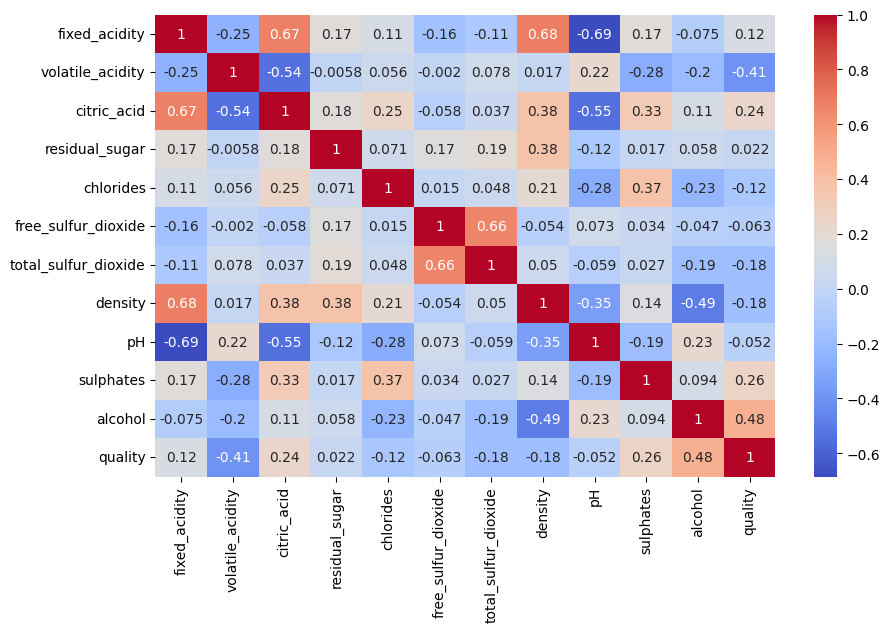

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Outlier Handling
df = df[(df["total_sulfur_dioxide"]<200)]

<Axes: xlabel='alcohol', ylabel='total_sulfur_dioxide'>

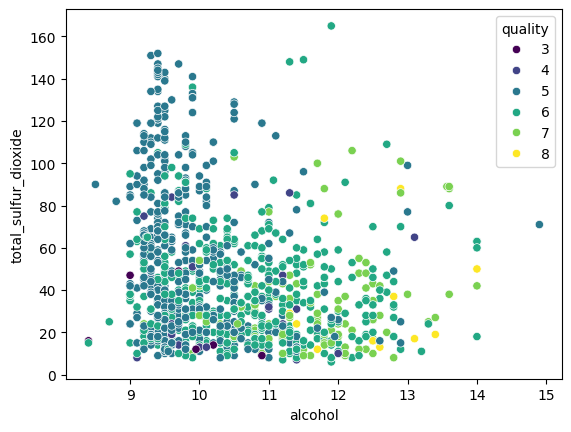

In [26]:
sns.scatterplot(data=df, x='alcohol', y='total_sulfur_dioxide',hue='quality', palette='viridis')

In [27]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,8.311832,0.531744,0.267642,2.522042,0.086997,15.577125,45.498247,0.996737,3.311543,0.657967,10.438855,5.654689
std,1.749042,0.179529,0.196100,1.335391,0.047283,10.218371,31.261756,0.001921,0.156293,0.170436,1.080341,0.804563
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997850,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\mazlu\AppData\Local\Temp\ipykernel_37892\3914025594.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


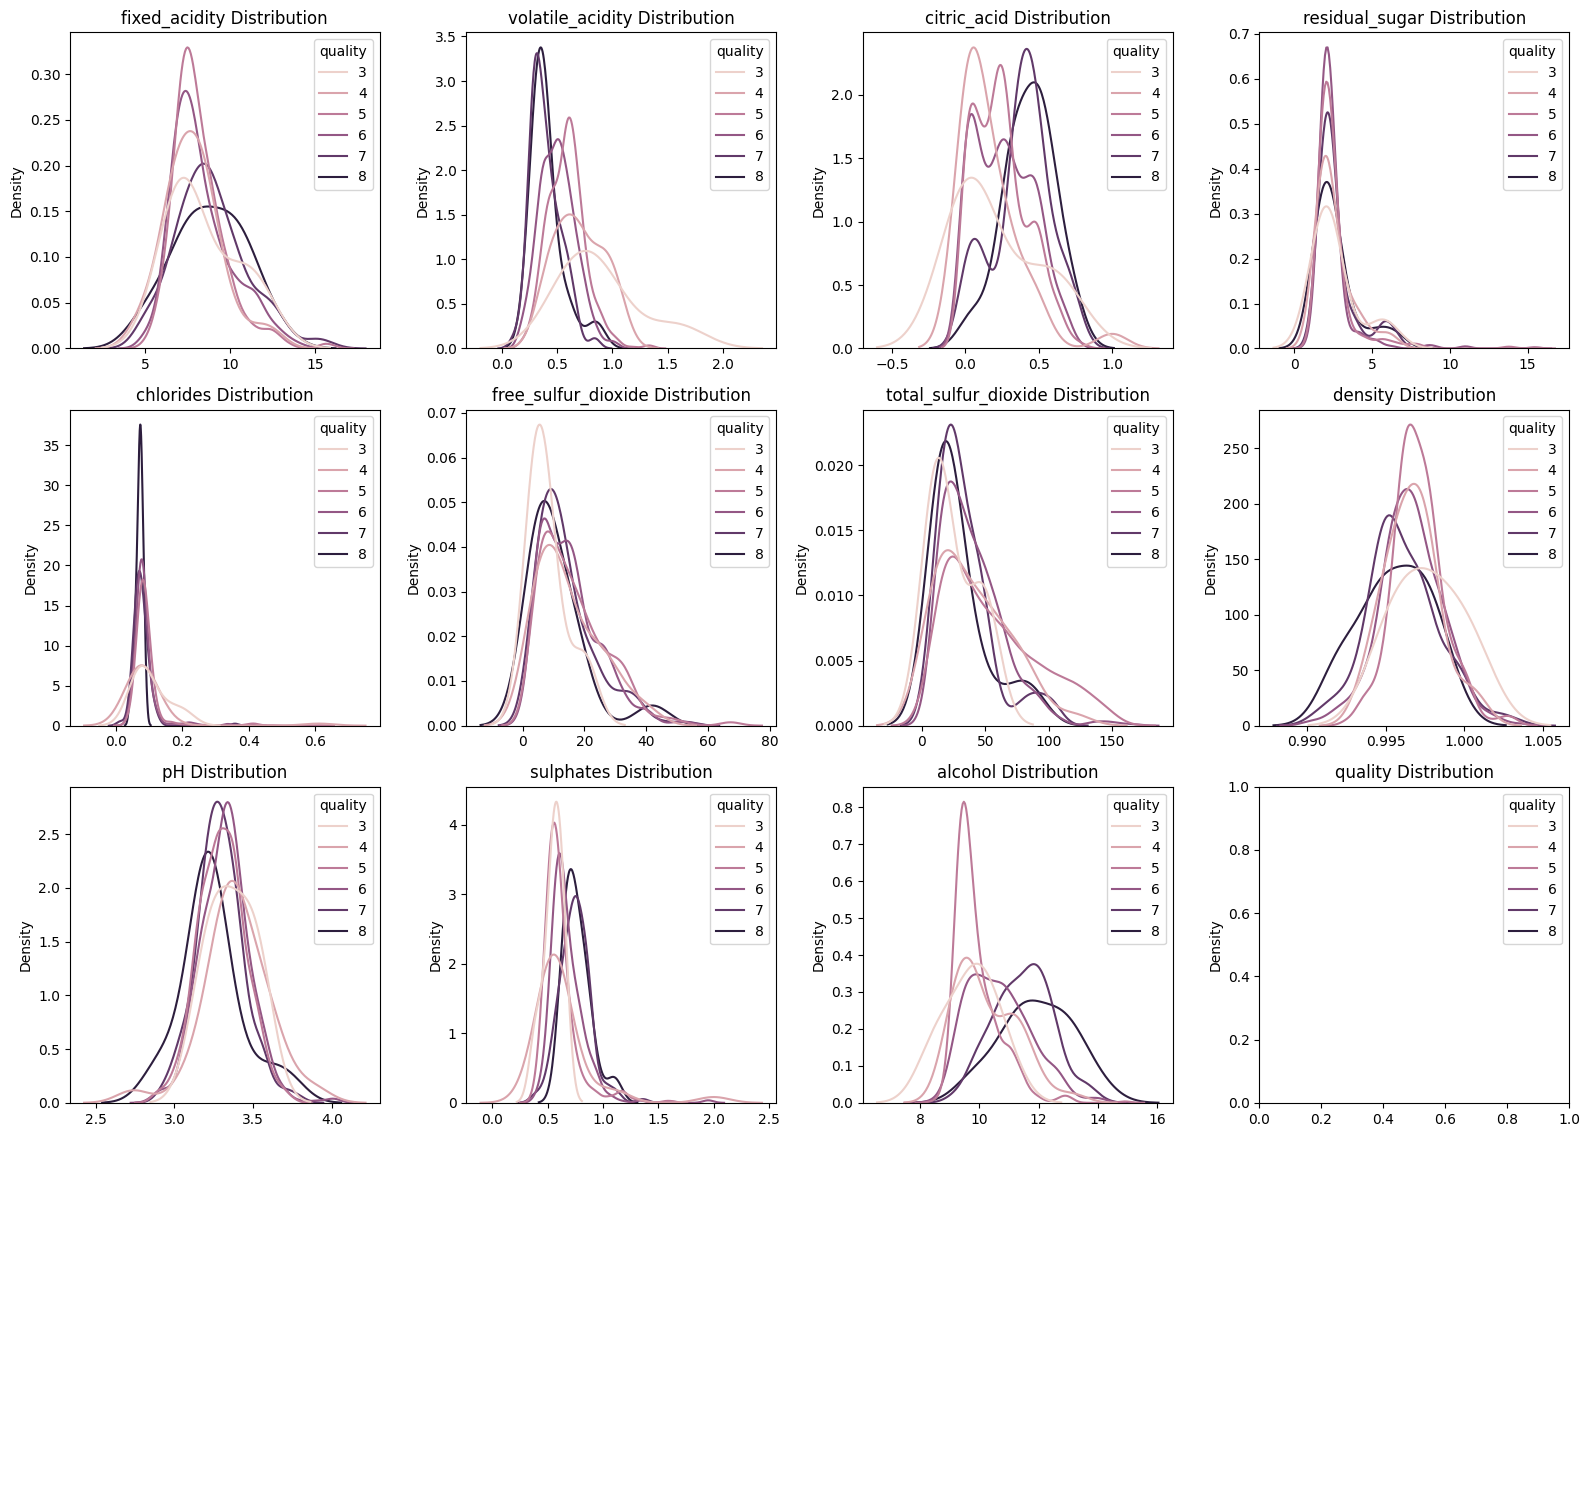

In [ ]:
# Data Analysis
import math

columns = df.columns
fig, ax = plt.subplots(4, 4, figsize=(16, 15)) # 4 -> # of rows, 4 -> # of columns
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    
    sns.kdeplot(
        data = df,
        x = column,
        hue=df.quality,
        ax=ax[i],
        common_norm=False
    )
    
    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
# hide empty ones
for i in range(i+1, len(ax)):
    ax[i].axis('off')

plt.tight_layout()

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']
y = y-3
map_2_class = {
    0: 0, 
    1: 0, 
    2: 0,  
    3: 1,  
    4: 1,  
    5: 1,
    6: 1
}

# 3. y değişkeninizi bu haritaya göre dönüştürün
y = y.map(map_2_class)

# 4. Yeni dağılımı kontrol edin (çok önemli!)
print("Yeni sınıf dağılımı (2 Sınıf):")
print(y.value_counts())

# 5. Modeli bu YENİ y ile eğitin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Yeni sınıf dağılımı (2 Sınıf):
quality
1    619
0    522
Name: count, dtype: int64


In [30]:
y.unique()

array([0, 1])

In [ ]:
# Imports models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
#Scale features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [ ]:
# Model Evaluation
def calculate_model_metrics(true, predicted):
    cf_matrix = confusion_matrix(true, predicted)
    accuary = accuracy_score(true, predicted)
    cl_report = classification_report(true, predicted)
    return cf_matrix, accuary, cl_report
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    model_train_cl_matrix, model_train_accuracy, model_train_cl_report = calculate_model_metrics(y_train, y_train_pred)
    model_test_cl_matrix, model_test_accuracy, model_test_cl_report = calculate_model_metrics(y_test, y_test_pred)


    print(list(models.values())[i])


    print("Evaluation for Train Set")
    print("Classification Report :", model_train_cl_report)
    print("Accuracy :", model_train_accuracy)
    print("Model Matrix : \n ", model_train_cl_matrix)


    print("-----------------------------")
   
    print("Evaluation for Test Set")
    print("Classification Report :", model_test_cl_report)
    print("Accuracy :", model_test_accuracy)
    print("Model Matrix : \n ", model_test_cl_matrix)


    print("-----------------------------")
    print("\n")


LogisticRegression()
Evaluation for Train Set
Classification Report :               precision    recall  f1-score   support

           0       0.74      0.74      0.74       420
           1       0.78      0.77      0.78       492

    accuracy                           0.76       912
   macro avg       0.76      0.76      0.76       912
weighted avg       0.76      0.76      0.76       912

Accuracy : 0.7598684210526315
Model Matrix : 
  [[312 108]
 [111 381]]
-----------------------------
Evaluation for Test Set
Classification Report :               precision    recall  f1-score   support

           0       0.71      0.75      0.73       102
           1       0.79      0.76      0.77       127

    accuracy                           0.76       229
   macro avg       0.75      0.76      0.75       229
weighted avg       0.76      0.76      0.76       229

Accuracy : 0.7554585152838428
Model Matrix : 
  [[77 25]
 [31 96]]
-----------------------------


KNeighborsClassifier()
Evalu

c:\Users\mazlu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\mazlu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [35]:
random_forest = RandomForestClassifier()
random_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=random_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [36]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': None,
 'bootstrap': True}

In [37]:
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       102
           1       0.82      0.78      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

[[80 22]
 [28 99]]
0.7816593886462883


In [38]:
grad = GradientBoostingClassifier()
grad_params = { 
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grad_random = RandomizedSearchCV(estimator=grad, param_distributions=grad_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
grad_random.fit(X_train, y_train)
y_pred_grad = grad_random.predict(X_test)
print(classification_report(y_test, y_pred_grad))
print(confusion_matrix(y_test, y_pred_grad))
print(accuracy_score(y_test, y_pred_grad))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       102
           1       0.82      0.76      0.79       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

[[81 21]
 [30 97]]
0.777292576419214


In [ ]:
# best model
best_grad_model = grad_random.best_estimator_

# Look at the order of importance
print(best_grad_model.feature_importances_)

[0.03074519 0.12768833 0.00915526 0.00402022 0.00370906 0.00555828
 0.09751732 0.00544846 0.00434948 0.14605921 0.56574919]


In [40]:
X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, )

selector = SelectFromModel(estimator=xgb_model, threshold=0.065, prefit=False) 


selector.fit(X_train, y_train)


X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


print(f"Orijinal özellik sayısı: {X_train.shape[1]}")
print(f"SelectFromModel sonrası özellik sayısı: {X_train_selected.shape[1]}")


selected_mask = selector.get_support()
final_selected_features = X_train.columns[selected_mask] #
print(f"\nSeçilen özellik isimleri ({len(final_selected_features)} adet):")
print(final_selected_features.tolist())


final_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
final_model.fit(X_train_selected, y_train)

y_pred_selected = final_model.predict(X_test_selected)
selected_accuracy = accuracy_score(y_test, y_pred_selected)
print(f"\nSeçilen özelliklerle model doğruluğu: {selected_accuracy:.4f}")

Orijinal özellik sayısı: 11
SelectFromModel sonrası özellik sayısı: 7

Seçilen özellik isimleri (7 adet):
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol']

Seçilen özelliklerle model doğruluğu: 0.7948


In [42]:
xgb_model = XGBClassifier()
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
random_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_xgb.fit(X_train, y_train)
y_pred_xgb = random_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       102
           1       0.82      0.77      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

[[81 21]
 [29 98]]
0.7816593886462883


In [43]:
random_xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 300,
 'max_depth': 7,
 'learning_rate': 0.01,
 'colsample_bytree': 0.6}

In [ ]:
pickle_xgb = XGBClassifier(subsample=0.6, n_estimators=300, max_depth=7, learning_rate=0.01, colsample_bytree=0.6, cv = 3)

In [46]:
pickle_xgb.fit(X_train, y_train)
y_pred_pickle = pickle_xgb.predict(X_test)
print(classification_report(y_test, y_pred_pickle))
print(confusion_matrix(y_test, y_pred_pickle))
print(accuracy_score(y_test, y_pred_pickle))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       102
           1       0.82      0.77      0.80       127

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229

[[81 21]
 [29 98]]
0.7816593886462883


In [47]:
import pickle 
with open('model_xgb.pkl', 'wb') as f:
    pickle.dump({
        'model' : pickle_xgb,
        'scaler': scale
    }, f)
